In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Patient

In [2]:
df1 = pd.read_excel("ConcertAI Data Science Interview Dataset.xlsx", sheet_name="Patient")
df1.head()

,patient_id,gender,race,date_of_birth,date_of_death
0,SP001100272,Female,Black or African American,1930-07-09,NaT
1,SP000045681,Female,White,1951-07-02,NaT
2,SP000417659,Female,White,1965-07-07,NaT
3,SP000569626,Female,White,1930-07-05,NaT
4,SP000134430,Female,NaN,1953-07-07,2025-10-21


In [3]:
df1.shape

(100, 5)

In [4]:
df1.patient_id.nunique()

94

In [5]:
df1.isnull().sum()

patient_id        0
gender            0
race             22
date_of_birth     0
date_of_death    77
dtype: int64

In [6]:
# Possible 6 duplicate patients
patients = df1['patient_id'].value_counts()
print(patients.head(6))

SP000503844    2
SP000569626    2
SP000547437    2
SP000330549    2
SP001309952    2
SP000474075    2
Name: patient_id, dtype: int64


In [7]:
df1_SP000503844 = df1[df1['patient_id'] == 'SP000503844']
df1_SP000503844.head()

,patient_id,gender,race,date_of_birth,date_of_death
73,SP000503844,Female,NaN,1937-07-04,NaT
74,SP000503844,Female,NaN,1937-07-07,NaT


#### ↑ Different DOBs

In [8]:
df1_SP000569626 = df1[df1['patient_id'] == 'SP000569626']
df1_SP000569626.head()

,patient_id,gender,race,date_of_birth,date_of_death
3,SP000569626,Female,White,1930-07-05,NaT
55,SP000569626,Female,White,1930-07-06,NaT


#### ↑ Different DOBs

In [9]:
df1_SP000547437 = df1[df1['patient_id'] == 'SP000547437']
df1_SP000547437.head()

,patient_id,gender,race,date_of_birth,date_of_death
6,SP000547437,Female,Black or African American,1963-07-02,2023-02-01
20,SP000547437,Female,Black or African American,1963-07-02,2022-02-01


#### ↑ Different DODs

In [10]:
df1_SP000330549 = df1[df1['patient_id'] == 'SP000330549']
df1_SP000330549.head()

,patient_id,gender,race,date_of_birth,date_of_death
58,SP000330549,Female,NaN,1972-07-09,NaT
78,SP000330549,Female,NaN,1972-07-07,NaT


#### ↑ Different DOBs

In [11]:
df1_SP001309952 = df1[df1['patient_id'] == 'SP001309952']
df1_SP001309952.head()

,patient_id,gender,race,date_of_birth,date_of_death
11,SP001309952,Female,White,1966-07-09,NaT
28,SP001309952,Female,White,1966-07-09,NaT


#### ↑ Duplicates -> drop any one

In [12]:
df1_SP000474075 = df1[df1['patient_id'] == 'SP000474075']
df1_SP000474075.head()

,patient_id,gender,race,date_of_birth,date_of_death
40,SP000474075,Female,White,1955-07-06,NaT
91,SP000474075,Female,White,1955-07-08,NaT


#### ↑ Different DOBs

In [13]:
df1.dtypes

patient_id               object
gender                   object
race                     object
date_of_birth    datetime64[ns]
date_of_death    datetime64[ns]
dtype: object

#### Cleaning the data table by keeping the earliest DOB and latest DOD

In [14]:
df1_clean = (
    df1.groupby("patient_id", as_index=False)
    .agg({
          "gender": "first",        # keep first instance
          "race": "first",          # keep first instance
          "date_of_birth": "min",   # earliest DOB
          "date_of_death": "max"    # latest DOD
      })
)
df1_clean.head()

,patient_id,gender,race,date_of_birth,date_of_death
0,SP000035853,Female,Other Race,1950-07-06,NaT
1,SP000045681,Female,White,1951-07-02,NaT
2,SP000117336,Female,Black or African American,1951-07-06,2012-07-06
3,SP000123715,Female,White,1941-07-08,NaT
4,SP000129668,Female,White,1970-07-05,NaT


In [15]:
df1_clean.shape

(94, 5)

In [16]:
df1_clean.patient_id.nunique()

94

In [17]:
# Checking for edge case where patient's DOB was the same

df1_SP001309952 = df1_clean[df1_clean['patient_id'] == 'SP001309952']
df1_SP001309952.head()

,patient_id,gender,race,date_of_birth,date_of_death
76,SP001309952,Female,White,1966-07-09,NaT


In [18]:
#### Calculating Age - assumption -> Missing DOD signifies patient still alive

# reference date = DOD if present, else today
today = pd.Timestamp.today().normalize()
ref_date = df1_clean["date_of_death"].fillna(today)
dob = df1_clean["date_of_birth"]

# age in whole years, corrected around birthdays
has_had_bday = (
    (ref_date.dt.month > dob.dt.month) |
    ((ref_date.dt.month == dob.dt.month) & (ref_date.dt.day >= dob.dt.day))
)
df1_clean["age_years"] = (ref_date.dt.year - dob.dt.year) - (~has_had_bday).astype(int)
df1_clean.head()

,patient_id,gender,race,date_of_birth,date_of_death,age_years
0,SP000035853,Female,Other Race,1950-07-06,NaT,75
1,SP000045681,Female,White,1951-07-02,NaT,74
2,SP000117336,Female,Black or African American,1951-07-06,2012-07-06,61
3,SP000123715,Female,White,1941-07-08,NaT,84
4,SP000129668,Female,White,1970-07-05,NaT,55


# Diagnosis

In [19]:
df2 = pd.read_excel("ConcertAI Data Science Interview Dataset.xlsx", sheet_name="Diagnosis")
df2.head()

,patient_id,diagnosis_date,diagnosis_code,diagnosis_name,diagnosis_system
0,SP001411515,2015-01-22 03:59:14,Z87.81,Personal History Of Traumatic Fracture,ICD10CM
1,SP000879678,2010-10-08 12:00:00,S62.339A,"Fx Of Neck Of Unsp Metacarpal Bone, Init For C...",ICD10CM
2,SP000730754,2015-12-25 00:00:00,D53.9,"Nutritional Anemia, Unspecified",ICD10CM
3,SP000417659,2015-06-30 12:00:00,E78.5,"Hyperlipidemia, Unspecified",ICD10CM
4,SP000730754,2019-07-23 00:00:00,H25.13,"Age-related Nuclear Cataract, Bilateral",ICD10CM


In [20]:
df2.shape

(22484, 5)

In [21]:
df2.patient_id.nunique()

96

#### 2 extra patients - remove them

In [22]:
id_patient = set(df1_clean["patient_id"].unique())
id_diagnosis = set(df2["patient_id"].unique())

# Find extra patients in df2
extra_ids = id_diagnosis - id_patient
print("Extra patient IDs in Diagnosis:", extra_ids)

Extra patient IDs in Diagnosis: {'SP000730565', 'SP001550464'}


In [23]:
# Remove these from Diagnosis sheet - since we have demographic info only for pateints in 'Patient' sheet 
# Alternatively we can leave as is, as when we join with 'Patients' sheet they will be removed automatically.

df2_cleaned = df2[~df2["patient_id"].isin(extra_ids)]
df2_cleaned.patient_id.nunique()

94

In [24]:
df2_cleaned.diagnosis_system.unique()

array(['ICD10CM', nan, 'ICD9CM'], dtype=object)

In [25]:
df2_cleaned.diagnosis_code.nunique()

1413

In [26]:
df2_cleaned.dtypes

patient_id          object
diagnosis_date      object
diagnosis_code      object
diagnosis_name      object
diagnosis_system    object
dtype: object

In [27]:
df2_cleaned.shape

(21706, 5)

In [28]:
df2_cleaned.isnull().sum()

patient_id            0
diagnosis_date        0
diagnosis_code      356
diagnosis_name        1
diagnosis_system    356
dtype: int64

In [29]:
# %age empty values

empty_values = (df2_cleaned['diagnosis_code'].isnull().sum()/df2_cleaned.shape[0])*100
print(f"Percent empty values: {empty_values:.2f}")

Percent empty values: 1.64


#### Assumption -> empty values for diagnosis_code are not leading with C50. or Z85. since small fraction of empty values
#### Assumption -> empty values for diagnosis_system are not ICD10 since small fraction of empty values

In [30]:
# Filter condition
mask = (
    df2_cleaned["diagnosis_system"].str.contains("ICD10", na=False) &
    df2_cleaned["diagnosis_code"].str.contains(r"(C50|Z85)", na=False)
)

filtered_df2 = df2_cleaned[mask]
filtered_df2.head()

C:\Users\ankit\AppData\Local\Temp\ipykernel_25820\3316587214.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df2_cleaned["diagnosis_code"].str.contains(r"(C50|Z85)", na=False)


,patient_id,diagnosis_date,diagnosis_code,diagnosis_name,diagnosis_system
7,SP001476419,2010-05-09 12:00:00,C50.919,Malignant Neoplasm Of Unspecified Site Of Unsp...,ICD10CM
9,SP000490408,2019-06-19 00:00:00,C50.411,Malignant Neoplasm Of Upper-outer Quadrant Of ...,ICD10CM
12,SP001336335,2017-03-23 12:00:00,C50.912,Malignant Neoplasm Of Unspecified Site Of Left...,ICD10CM
18,SP001142266,2019-06-19 10:03:02,C50.412,Malignant Neoplasm Of Upper-outer Quadrant Of ...,ICD10CM
26,SP000503844,2017-05-06 12:00:00,C50.919,Malignant Neoplasm Of Unspecified Site Of Unsp...,ICD10CM


#### We see similar 'diagnosis_code', 'diagnosis_name' & 'diagnosis_system' for multiple dates. I decided to keep all the entries since a patient diagnosed with ICD10 with a leading code C50. or Z85. can have this diagnosis on any date and we don't want to miss any of this diagnosis by keeping latest entry or removing duplicates based on 'diagnosis_name'. Additionally, want to retain the longitudinal history of the patients since the question asks: 'How many patients ***have been*** diagnosed with an ICD10 diagnosis code leading with C50. or Z85.?'.

In [31]:
filtered_df2.diagnosis_system.unique()

array(['ICD10CM'], dtype=object)

In [32]:
filtered_df2.diagnosis_code.unique()

array(['C50.919', 'C50.411', 'C50.912', 'C50.412', 'C50.911', 'Z85.3',
       'C50', 'C50.419', 'C50.111', 'C50.819', 'C50.011', 'C50.212',
       'C50.812', 'C50.211', 'C50.511', 'C50.321', 'C50.012', 'C50.319',
       'Z85.72', 'Z85.79', 'C50.119', 'Z85.828', 'C50.921', 'C50.811',
       'C50.019', 'Z85.71', 'Z85.830', 'C50.112', 'Z85.820', 'C50.219',
       'Z85.038', 'C50.519', 'Z85.00', 'C50.312', 'C50.512', 'Z85.9'],
      dtype=object)

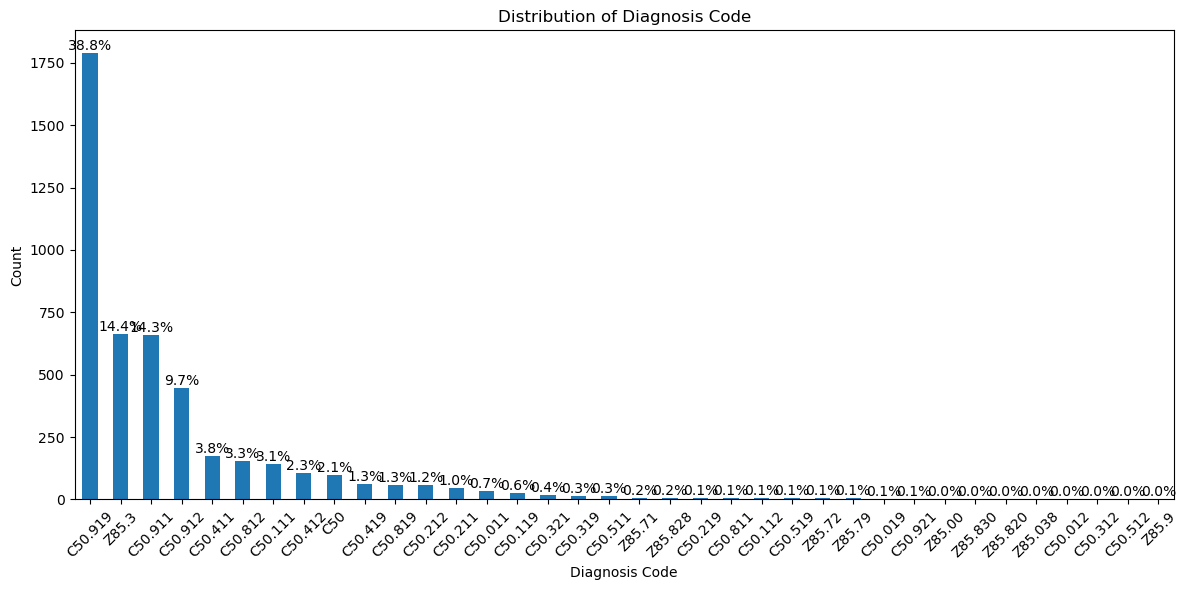

In [33]:
fig, axes = plt.subplots(figsize=(12, 6))

# 'diagnosis_code' counts
counts = filtered_df2["diagnosis_code"].value_counts(dropna=False)
total = counts.sum()

# Plot
counts.plot(kind="bar", ax=axes)
axes.set_title("Distribution of Diagnosis Code")
axes.set_xlabel("Diagnosis Code")
axes.set_ylabel("Count")
axes.tick_params(axis="x", rotation=45)

# Add labels
for p in axes.patches:
    value = p.get_height()
    percent = 100 * value / total
    axes.annotate(
        f"{percent:.1f}%",
        (p.get_x() + p.get_width() / 2., value),
        ha='center', va='bottom'
    )
plt.tight_layout()
plt.show()

In [34]:
filtered_df2.shape

(4621, 5)

In [35]:
# First Question's answer
print(f"No. of patients that have been diagnosed with an ICD10 diagnosis code leading with C50. or Z85.: {filtered_df2.patient_id.nunique()}")

No. of patients that have been diagnosed with an ICD10 diagnosis code leading with C50. or Z85.: 94


### Join Patient data table and Diagnosis data table to get demographics

In [36]:
pat_dia_merged_df = pd.merge(df1_clean, filtered_df2, on = 'patient_id', how = 'left')
pat_dia_merged_df.head()

,patient_id,gender,race,date_of_birth,date_of_death,age_years,diagnosis_date,diagnosis_code,diagnosis_name,diagnosis_system
0,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM
1,SP000035853,Female,Other Race,1950-07-06,NaT,75,2014-12-30 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM
2,SP000035853,Female,Other Race,1950-07-06,NaT,75,2016-12-28 12:00:00,Z85.3,Personal History Of Malignant Neoplasm Of Breast,ICD10CM
3,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-03-21 12:00:00,C50.919,Malignant Neoplasm Of Unspecified Site Of Unsp...,ICD10CM
4,SP000035853,Female,Other Race,1950-07-06,NaT,75,2017-10-09 12:00:00,Z85.3,Personal History Of Malignant Neoplasm Of Breast,ICD10CM


In [37]:
pat_dia_merged_df.shape

(4621, 10)

In [38]:
pat_dia_merged_df.isnull().sum()

patient_id             0
gender                 0
race                1647
date_of_birth          0
date_of_death       3218
age_years              0
diagnosis_date         0
diagnosis_code         0
diagnosis_name         0
diagnosis_system       0
dtype: int64

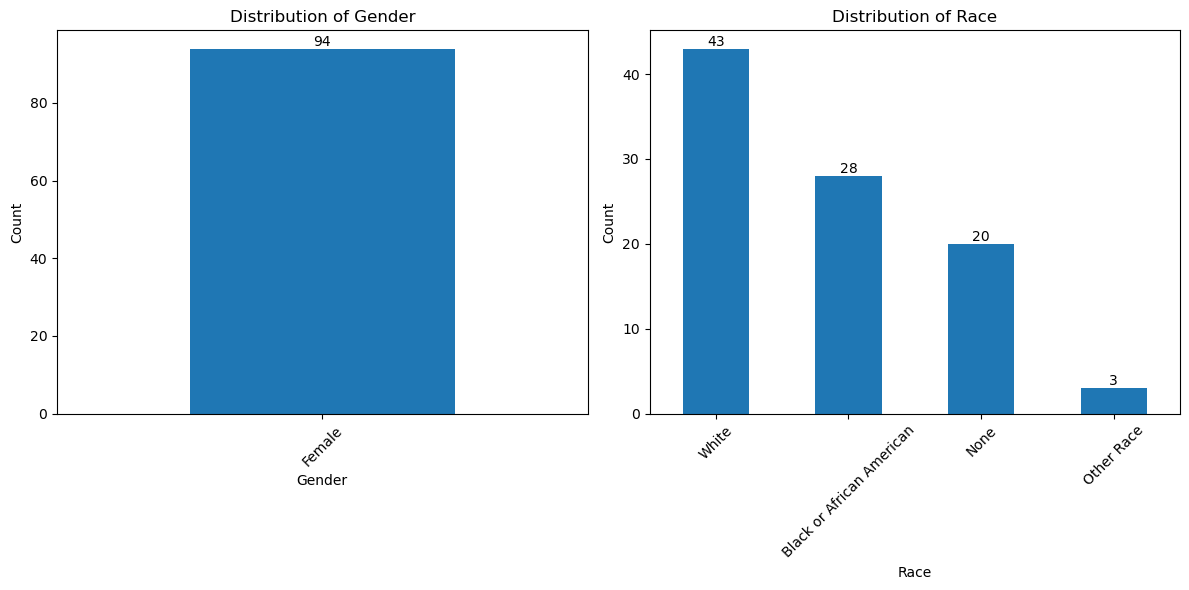

In [39]:
# Keep one row per unique patient
unique_patients = pat_dia_merged_df.drop_duplicates(subset="patient_id")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gender counts
gender_counts = unique_patients["gender"].value_counts(dropna=False)
gender_counts.plot(kind="bar", ax=axes[0])
axes[0].set_title("Distribution of Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=45)

# Adding labels
for p in axes[0].patches:
    axes[0].annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

# Race counts
race_counts = unique_patients["race"].value_counts(dropna=False)
race_counts.plot(kind="bar", ax=axes[1])
axes[1].set_title("Distribution of Race")
axes[1].set_xlabel("Race")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=45)

# Adding labels
for p in axes[1].patches:
    axes[1].annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

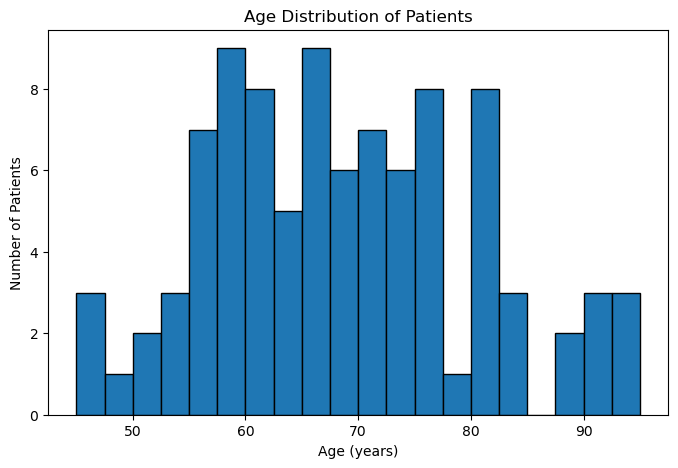

In [40]:
# Histogram for age
plt.figure(figsize=(8, 5))
plt.hist(unique_patients["age_years"].dropna(), bins=20, edgecolor="black")
plt.title("Age Distribution of Patients")
plt.xlabel("Age (years)")
plt.ylabel("Number of Patients")
plt.show()

In [41]:
unique_patients["age_years"].describe()

count    94.000000
mean     68.510638
std      11.697573
min      45.000000
25%      59.000000
50%      67.500000
75%      76.000000
max      95.000000
Name: age_years, dtype: float64

# Medication

In [42]:
df3 = pd.read_excel("ConcertAI Data Science Interview Dataset.xlsx", sheet_name="Medication")
df3.head()

,patient_id,med_start_date,med_end_date,med_generic_name,med_route_name,med_status,med_dose
0,SP000449423,2015-12-22 12:00:00,2016-11-30 12:00:00,valsartan,Oral route,ordered,1.0
1,SP001550464,2018-04-23 18:28:00,NaT,eribulin,NaN,administered,2.5
2,SP000547437,2016-02-04 14:28:00,NaT,Potassium Chloride,NaN,administered,20.0
3,SP001550464,2017-03-15 17:58:00,NaT,vinorelbine,NaN,administered,44.0
4,SP001524174,2010-12-09 14:58:00,NaT,moxifloxacin,NaN,administered,1.0


In [43]:
df3.shape

(36800, 7)

In [44]:
df3.dtypes

patient_id                  object
med_start_date      datetime64[ns]
med_end_date        datetime64[ns]
med_generic_name            object
med_route_name              object
med_status                  object
med_dose                   float64
dtype: object

In [45]:
df3.isnull().sum()

patient_id              0
med_start_date          0
med_end_date        22915
med_generic_name       44
med_route_name      21014
med_status             44
med_dose             4348
dtype: int64

In [46]:
df3.patient_id.nunique()

96

#### We'll let join take care of extra patient IDs this time

In [47]:
df3.med_generic_name.nunique()

386

In [48]:
df3.med_route_name.nunique()

26

In [49]:
df3.med_status.unique()

array(['ordered', 'administered', 'Administered', nan], dtype=object)

#### Join with 'pat_dia_merged_df' to get cohort medication information

In [50]:
pat_dia_med_merged_df = pd.merge(pat_dia_merged_df, df3, on = 'patient_id', how = 'left')
pat_dia_med_merged_df.head()

,patient_id,gender,race,date_of_birth,date_of_death,age_years,diagnosis_date,diagnosis_code,diagnosis_name,diagnosis_system,med_start_date,med_end_date,med_generic_name,med_route_name,med_status,med_dose
0,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2014-12-01 05:47:00,NaT,Docusate,NaN,administered,200.0
1,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2018-11-23 00:00:00,2018-11-25 00:00:00,Glucagon,Intramuscular route,ordered,1.0
2,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2018-11-29 00:00:00,NaT,atorvastatin,Oral route,ordered,20.0
3,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2018-11-22 00:00:00,2018-11-22 00:00:00,"insulin, isophane",Subcutaneous route,ordered,10.0
4,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2013-10-02 12:00:00,2013-10-02 12:00:00,prednisolone,Ocular route,ordered,1.0


In [51]:
pat_dia_med_merged_df.patient_id.nunique()

94

#### ↑ Extra patients removed

In [52]:
pat_dia_med_merged_df.shape

(3220148, 16)

#### Assumption -> Medication duration: Missing 'med_end_date' means medication still ongoing

In [53]:
today = pd.Timestamp.today().normalize()
pat_dia_med_merged_df["med_end_date_filled"] = pat_dia_med_merged_df["med_end_date"].fillna(today)

pat_dia_med_merged_df["med_duration_days"] = (pat_dia_med_merged_df["med_end_date_filled"] - pat_dia_med_merged_df["med_start_date"]).dt.days

pat_dia_med_merged_df.head()

,patient_id,gender,race,date_of_birth,date_of_death,age_years,diagnosis_date,diagnosis_code,diagnosis_name,diagnosis_system,med_start_date,med_end_date,med_generic_name,med_route_name,med_status,med_dose,med_end_date_filled,med_duration_days
0,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2014-12-01 05:47:00,NaT,Docusate,NaN,administered,200.0,2025-08-31 00:00:00,3925
1,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2018-11-23 00:00:00,2018-11-25 00:00:00,Glucagon,Intramuscular route,ordered,1.0,2018-11-25 00:00:00,2
2,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2018-11-29 00:00:00,NaT,atorvastatin,Oral route,ordered,20.0,2025-08-31 00:00:00,2467
3,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2018-11-22 00:00:00,2018-11-22 00:00:00,"insulin, isophane",Subcutaneous route,ordered,10.0,2018-11-22 00:00:00,0
4,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2013-10-02 12:00:00,2013-10-02 12:00:00,prednisolone,Ocular route,ordered,1.0,2013-10-02 12:00:00,0


In [54]:
pat_dia_med_merged_df.med_duration_days.describe()

count    3.220148e+06
mean     2.470668e+03
std      3.125013e+03
min     -2.911000e+03
25%      3.000000e+00
50%      3.111000e+03
75%      4.022000e+03
max      4.589400e+04
Name: med_duration_days, dtype: float64

In [55]:
pat_dia_med_merged_df_check = pat_dia_med_merged_df[pat_dia_med_merged_df['med_duration_days'] < 0]
pat_dia_med_merged_df_check.head()

,patient_id,gender,race,date_of_birth,date_of_death,age_years,diagnosis_date,diagnosis_code,diagnosis_name,diagnosis_system,med_start_date,med_end_date,med_generic_name,med_route_name,med_status,med_dose,med_end_date_filled,med_duration_days
57887,SP000134430,Female,None,1953-07-07,2025-10-21,72,2017-05-02 12:00:00,C50.919,Malignant Neoplasm Of Unspecified Site Of Unsp...,ICD10CM,2016-12-02 12:00:00,2016-12-01 12:00:00,Enoxaparin,Subcutaneous route,ordered,40.0,2016-12-01 12:00:00,-1
58458,SP000134430,Female,None,1953-07-07,2025-10-21,72,2014-08-17 12:00:00,C50.919,Malignant Neoplasm Of Unspecified Site Of Unsp...,ICD10CM,2016-12-02 12:00:00,2016-12-01 12:00:00,Enoxaparin,Subcutaneous route,ordered,40.0,2016-12-01 12:00:00,-1
59029,SP000134430,Female,None,1953-07-07,2025-10-21,72,2017-04-03 12:00:00,C50.919,Malignant Neoplasm Of Unspecified Site Of Unsp...,ICD10CM,2016-12-02 12:00:00,2016-12-01 12:00:00,Enoxaparin,Subcutaneous route,ordered,40.0,2016-12-01 12:00:00,-1
59600,SP000134430,Female,None,1953-07-07,2025-10-21,72,2016-11-29 12:00:00,C50.912,Malignant Neoplasm Of Unspecified Site Of Left...,ICD10CM,2016-12-02 12:00:00,2016-12-01 12:00:00,Enoxaparin,Subcutaneous route,ordered,40.0,2016-12-01 12:00:00,-1
60171,SP000134430,Female,None,1953-07-07,2025-10-21,72,2014-07-14 12:00:00,C50.212,Malignant Neoplasm Of Upper-inner Quadrant Of ...,ICD10CM,2016-12-02 12:00:00,2016-12-01 12:00:00,Enoxaparin,Subcutaneous route,ordered,40.0,2016-12-01 12:00:00,-1


In [56]:
pat_dia_med_merged_df_check.shape

(4955, 18)

#### Seems like an error in data entry and values in columns 'med_start_date' & 'med_end_date' seem interchanged leading to negative 'med_duration_days' values for ~5k entries. We will take absolute values for 'med_duration_days' for these cases.

In [57]:
# fix negative values for 'med_duration_days'
pat_dia_med_merged_df["med_duration_days"] = pat_dia_med_merged_df["med_duration_days"].abs()
pat_dia_med_merged_df.head()

,patient_id,gender,race,date_of_birth,date_of_death,age_years,diagnosis_date,diagnosis_code,diagnosis_name,diagnosis_system,med_start_date,med_end_date,med_generic_name,med_route_name,med_status,med_dose,med_end_date_filled,med_duration_days
0,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2014-12-01 05:47:00,NaT,Docusate,NaN,administered,200.0,2025-08-31 00:00:00,3925
1,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2018-11-23 00:00:00,2018-11-25 00:00:00,Glucagon,Intramuscular route,ordered,1.0,2018-11-25 00:00:00,2
2,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2018-11-29 00:00:00,NaT,atorvastatin,Oral route,ordered,20.0,2025-08-31 00:00:00,2467
3,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2018-11-22 00:00:00,2018-11-22 00:00:00,"insulin, isophane",Subcutaneous route,ordered,10.0,2018-11-22 00:00:00,0
4,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2013-10-02 12:00:00,2013-10-02 12:00:00,prednisolone,Ocular route,ordered,1.0,2013-10-02 12:00:00,0


In [58]:
pat_dia_med_merged_df.med_duration_days.describe()

count    3.220148e+06
mean     2.471619e+03
std      3.124261e+03
min      0.000000e+00
25%      3.000000e+00
50%      3.111000e+03
75%      4.022000e+03
max      4.589400e+04
Name: med_duration_days, dtype: float64

In [59]:
pat_dia_med_merged_df.med_generic_name.unique()

array(['Docusate', 'Glucagon', 'atorvastatin', 'insulin, isophane',
       'prednisolone', 'Ondansetron', 'Metformin', 'brimonidine',
       'Flurbiprofen', 'Succinylcholine', 'Ciprofloxacin', 'Simvastatin',
       'pioglitazone', 'Tropicamide', 'Regular Insulin, Human',
       'Dexamethasone', 'Acetaminophen', 'moxifloxacin',
       'Cyclophosphamide', 'latanoprost', 'Cyclopentolate',
       'Phenylephrine', 'Lorazepam', 'Glipizide', 'dorzolamide',
       'Fluoxetine', 'docetaxel', 'Loperamide', 'Alendronate', 'Fentanyl',
       'sennosides, USP', 'Promethazine', 'Glucose', 'brinzolamide',
       'anastrozole', 'Midazolam', 'Propofol', 'Cefazolin', 'benzonatate',
       'Cephalexin', 'tamsulosin', 'Albuterol', 'Ephedrine', 'Ibuprofen',
       'Magnesium Sulfate', 'ropivacaine', 'Clarithromycin', 'Glyburide',
       'Etodolac', 'Morphine', 'Linagliptin', 'Prochlorperazine',
       'Hydromorphone', 'Lidocaine', 'Amoxicillin', 'Allopurinol',
       'Hydroxyzine', 'Ranitidine', 'Methocarb

In [60]:
pat_dia_med_merged_df.med_route_name.unique()

array([nan, 'Intramuscular route', 'Oral route', 'Subcutaneous route',
       'Ocular route', 'Injection route', 'Intravenous route', 'Oral',
       'Inhalation Dosage Form route', 'Sublingual route',
       'Unknown route', 'Transdermal route', 'Topical Route',
       'Nebuliser Suspension route', 'Vaginal route', 'Liquid route',
       'Nasal route', 'Catheter route', 'Rectal route',
       'Intradermal route', 'Epidural route', 'Transmucosal Route',
       'Submucosal Route', 'Intraarticular route', 'Nasogastric Route',
       'Auricular route', 'Percutaneous Route'], dtype=object)

#### Cleaning string columns 'med_generic_name', 'med_route_name' & 'med_status'

In [61]:
# making 'med_generic_name' column lower case to keep naming consistent
pat_dia_med_merged_df["med_generic_name"] = pat_dia_med_merged_df["med_generic_name"].str.lower()

# remove string 'route' from column 'med_route_name' to avoid duplicates -> 'Oral' & 'Oral route' are the same
pat_dia_med_merged_df["med_route_name"] = (
    pat_dia_med_merged_df["med_route_name"]
    .str.replace("route", "", case=False, regex=True)  # remove "route"
    .str.strip()                                       # trim spaces
)

# making 'med_status' column lower case to keep naming consistent
pat_dia_med_merged_df["med_status"] = pat_dia_med_merged_df["med_status"].str.lower()

pat_dia_med_merged_df.head()

,patient_id,gender,race,date_of_birth,date_of_death,age_years,diagnosis_date,diagnosis_code,diagnosis_name,diagnosis_system,med_start_date,med_end_date,med_generic_name,med_route_name,med_status,med_dose,med_end_date_filled,med_duration_days
0,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2014-12-01 05:47:00,NaT,docusate,NaN,administered,200.0,2025-08-31 00:00:00,3925
1,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2018-11-23 00:00:00,2018-11-25 00:00:00,glucagon,Intramuscular,ordered,1.0,2018-11-25 00:00:00,2
2,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2018-11-29 00:00:00,NaT,atorvastatin,Oral,ordered,20.0,2025-08-31 00:00:00,2467
3,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2018-11-22 00:00:00,2018-11-22 00:00:00,"insulin, isophane",Subcutaneous,ordered,10.0,2018-11-22 00:00:00,0
4,SP000035853,Female,Other Race,1950-07-06,NaT,75,2015-02-01 12:00:00,C50.911,Malignant Neoplasm Of Unspecified Site Of Righ...,ICD10CM,2013-10-02 12:00:00,2013-10-02 12:00:00,prednisolone,Ocular,ordered,1.0,2013-10-02 12:00:00,0


In [62]:
pat_dia_med_merged_df.med_generic_name.unique()

array(['docusate', 'glucagon', 'atorvastatin', 'insulin, isophane',
       'prednisolone', 'ondansetron', 'metformin', 'brimonidine',
       'flurbiprofen', 'succinylcholine', 'ciprofloxacin', 'simvastatin',
       'pioglitazone', 'tropicamide', 'regular insulin, human',
       'dexamethasone', 'acetaminophen', 'moxifloxacin',
       'cyclophosphamide', 'latanoprost', 'cyclopentolate',
       'phenylephrine', 'lorazepam', 'glipizide', 'dorzolamide',
       'fluoxetine', 'docetaxel', 'loperamide', 'alendronate', 'fentanyl',
       'sennosides, usp', 'promethazine', 'glucose', 'brinzolamide',
       'anastrozole', 'midazolam', 'propofol', 'cefazolin', 'benzonatate',
       'cephalexin', 'tamsulosin', 'albuterol', 'ephedrine', 'ibuprofen',
       'magnesium sulfate', 'ropivacaine', 'clarithromycin', 'glyburide',
       'etodolac', 'morphine', 'linagliptin', 'prochlorperazine',
       'hydromorphone', 'lidocaine', 'amoxicillin', 'allopurinol',
       'hydroxyzine', 'ranitidine', 'methocarb

In [63]:
pat_dia_med_merged_df.med_route_name.unique()

array([nan, 'Intramuscular', 'Oral', 'Subcutaneous', 'Ocular',
       'Injection', 'Intravenous', 'Inhalation Dosage Form', 'Sublingual',
       'Unknown', 'Transdermal', 'Topical', 'Nebuliser Suspension',
       'Vaginal', 'Liquid', 'Nasal', 'Catheter', 'Rectal', 'Intradermal',
       'Epidural', 'Transmucosal', 'Submucosal', 'Intraarticular',
       'Nasogastric', 'Auricular', 'Percutaneous'], dtype=object)

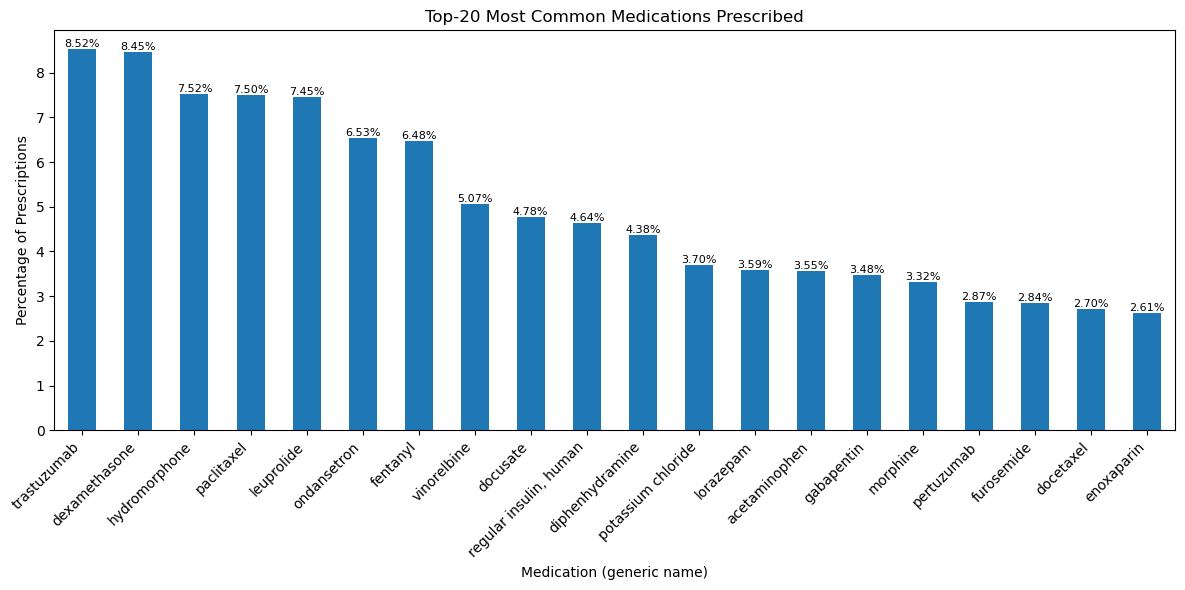

In [64]:
# Count medications (top 20)
med_counts = pat_dia_med_merged_df["med_generic_name"].value_counts().sort_values(ascending=False).head(20)
total = med_counts.sum()
med_perc = med_counts / total * 100

# Plot
plt.figure(figsize=(12, 6))
ax = med_perc.plot(kind="bar")

plt.title("Top-20 Most Common Medications Prescribed")
plt.xlabel("Medication (generic name)")
plt.ylabel("Percentage of Prescriptions")
plt.xticks(rotation=45, ha="right")

# Add percentage labels
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"{value:.2f}%", 
        (p.get_x() + p.get_width() / 2., value),
        ha="center", va="bottom", fontsize=8
    )

plt.tight_layout()
plt.show()

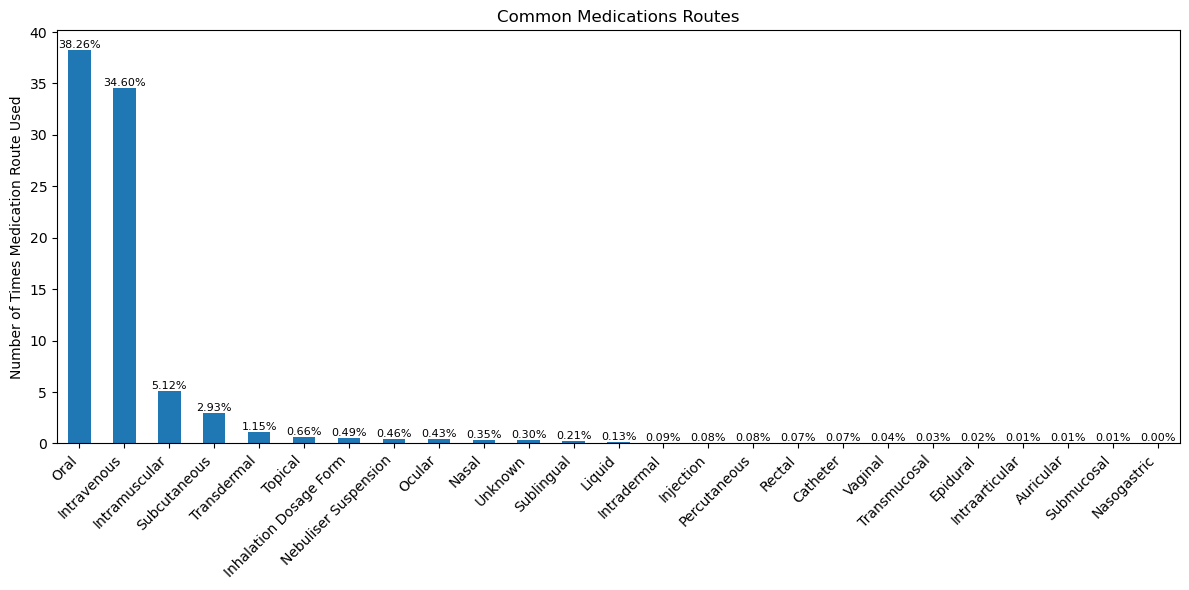

In [65]:
# Understanding the medications route name

# Count route name
med_route_counts = pat_dia_med_merged_df["med_route_name"].value_counts().sort_values(ascending=False)
total_route = med_route_counts.sum()
med_route_perc = med_route_counts / total * 100

# Plot
plt.figure(figsize=(12, 6))
ax = med_route_perc.plot(kind="bar")

plt.title("Common Medications Routes")
plt.ylabel("Number of Times Medication Route Used")
plt.xticks(rotation=45, ha="right")

# Add percentage labels
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"{value:.2f}%",
        (p.get_x() + p.get_width() / 2., value),
        ha="center", va="bottom", fontsize=8
    )

plt.tight_layout()
plt.show()

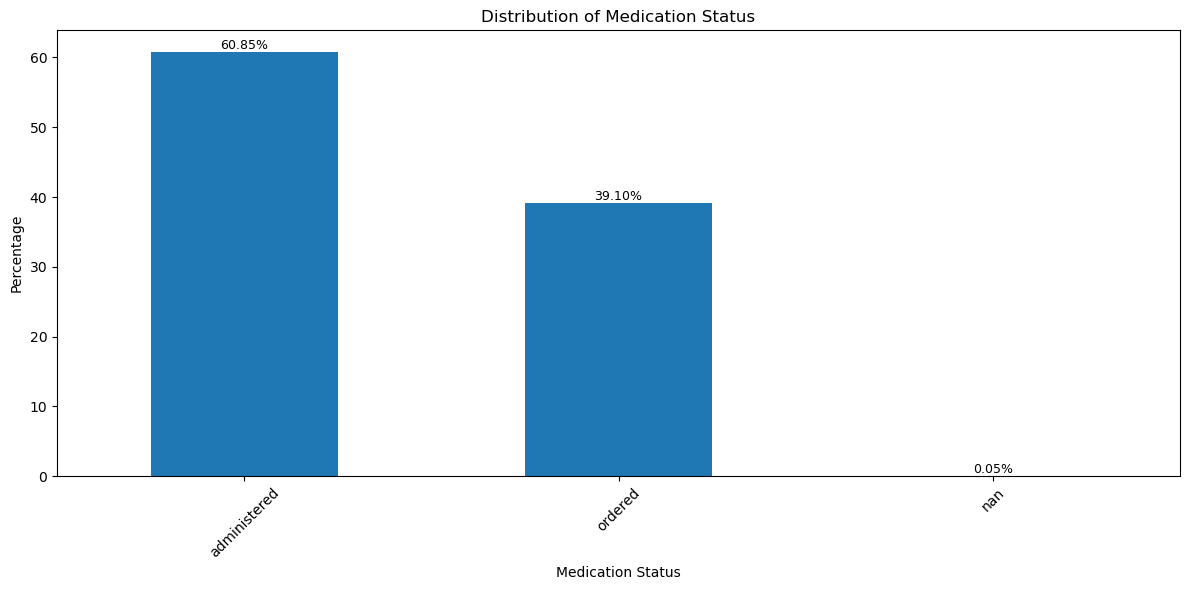

In [66]:
fig, axes = plt.subplots(figsize=(12, 6))

# Get counts and convert to percentages
counts = pat_dia_med_merged_df["med_status"].value_counts(dropna=False)
total = counts.sum()
perc = counts / total * 100 

# Plot
perc.plot(kind="bar", ax=axes)

axes.set_title("Distribution of Medication Status")
axes.set_xlabel("Medication Status")
axes.set_ylabel("Percentage")
axes.tick_params(axis="x", rotation=45)

# Add % labels
for p in axes.patches:
    value = p.get_height()
    axes.annotate(
        f"{value:.2f}%",
        (p.get_x() + p.get_width() / 2., value),
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()

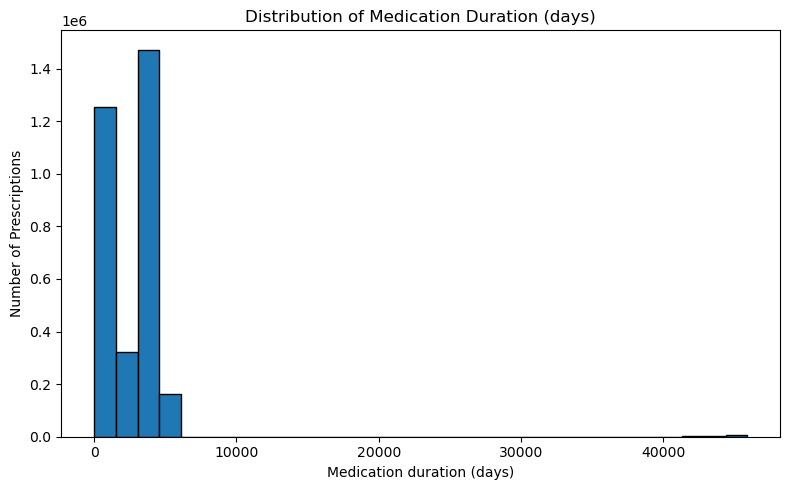

In [67]:
# Distribution of 'med_duration_days'

plt.figure(figsize=(8, 5))
plt.hist(pat_dia_med_merged_df["med_duration_days"].dropna(), bins=30, edgecolor="black")

plt.title("Distribution of Medication Duration (days)")
plt.xlabel("Medication duration (days)")
plt.ylabel("Number of Prescriptions")

plt.tight_layout()
plt.show()

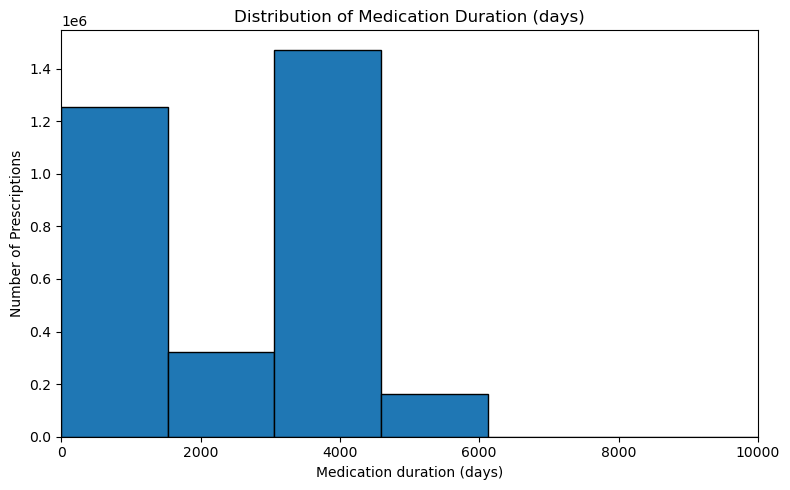

In [68]:
# Distribution of 'med_duration_days' more granular to see < 10,000 days

plt.figure(figsize=(8, 5))
plt.hist(pat_dia_med_merged_df["med_duration_days"].dropna(), bins=30, edgecolor="black")

plt.title("Distribution of Medication Duration (days)")
plt.xlabel("Medication duration (days)")
plt.ylabel("Number of Prescriptions")
plt.xlim(0, 10000)

plt.tight_layout()
plt.show()

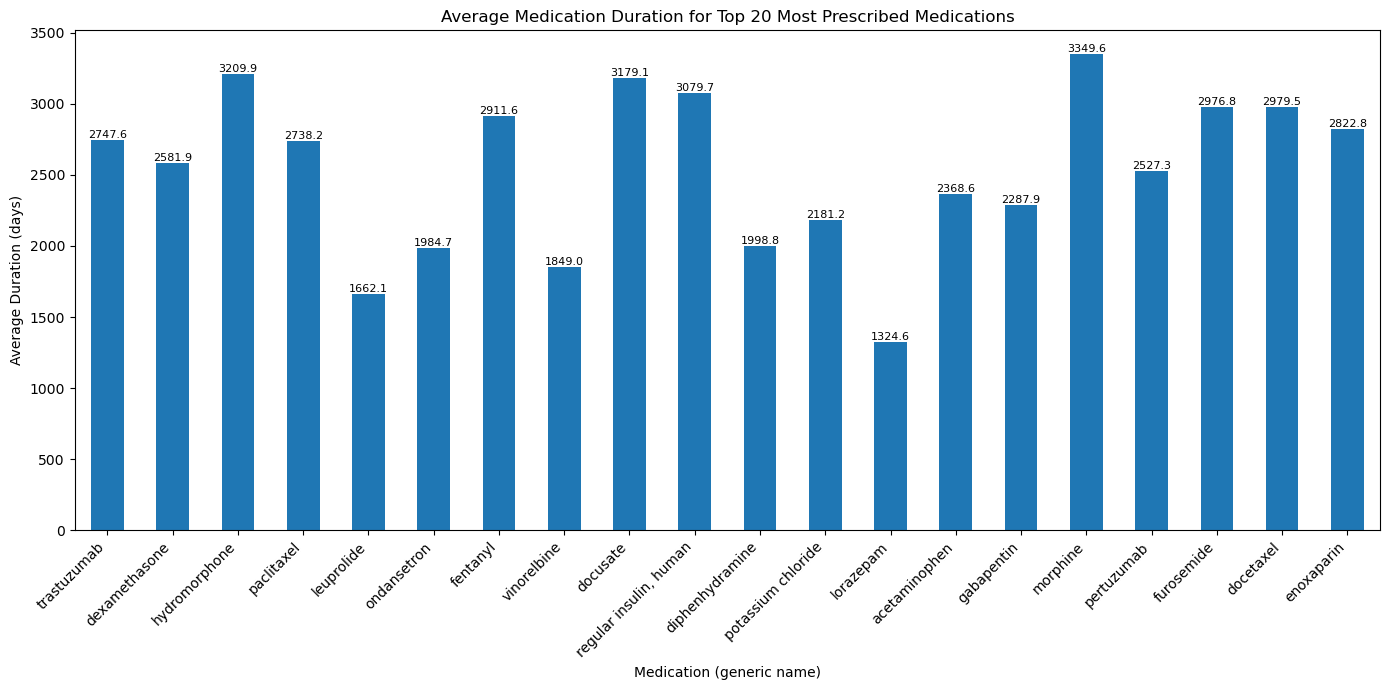

In [69]:
# Compute average duration for top-20 medications prescribed
top_meds = med_counts.index

avg_duration_top = (
    pat_dia_med_merged_df[pat_dia_med_merged_df["med_generic_name"].isin(top_meds)]
      .groupby("med_generic_name")["med_duration_days"]
      .mean()
      .reindex(top_meds)
)

# Plot
plt.figure(figsize=(14, 7))
ax = avg_duration_top.plot(kind="bar")

plt.title("Average Medication Duration for Top 20 Most Prescribed Medications")
plt.xlabel("Medication (generic name)")
plt.ylabel("Average Duration (days)")

plt.xticks(rotation=45, ha="right")

# Add labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom", fontsize=8
    )

plt.tight_layout()
plt.show()

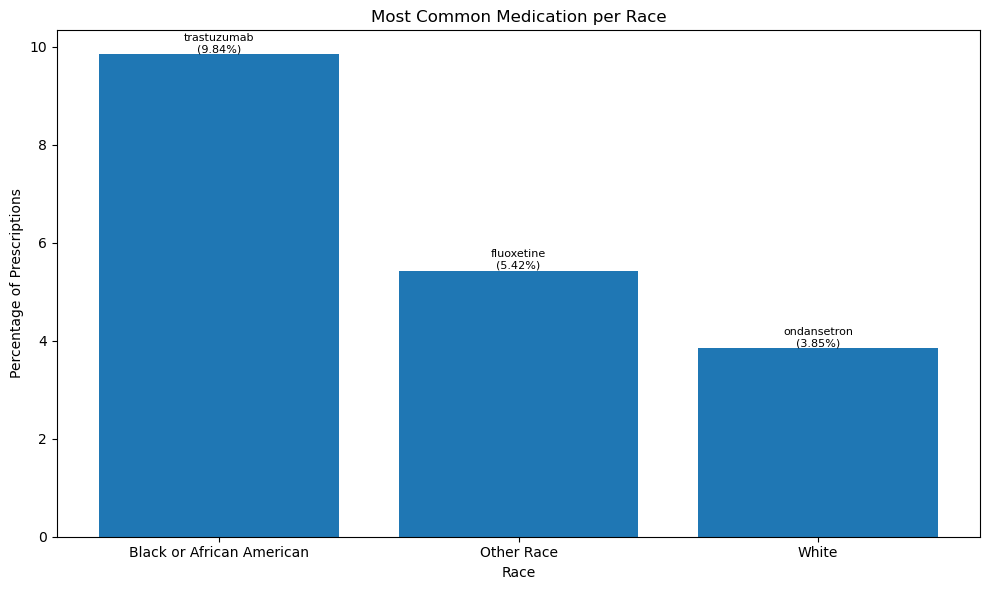

In [70]:
# Count prescriptions by race and med
race_med_counts = (
    pat_dia_med_merged_df.groupby(["race", "med_generic_name"])
      .size()
      .reset_index(name="count")
)

# Compute total prescriptions per race
race_totals = race_med_counts.groupby("race")["count"].transform("sum")
race_med_counts["percent"] = race_med_counts["count"] / race_totals * 100

# For each race, pick the med with highest count
top_meds_by_race = (
    race_med_counts.loc[
        race_med_counts.groupby("race")["count"].idxmax()
    ]
    .sort_values("percent", ascending=False)
)

# Plot
plt.figure(figsize=(10, 6))
ax = plt.bar(top_meds_by_race["race"], top_meds_by_race["percent"])

plt.title("Most Common Medication per Race")
plt.xlabel("Race")
plt.ylabel("Percentage of Prescriptions")

# Add labels with med name + percentage
for i, (race, med, percent) in enumerate(
    zip(top_meds_by_race["race"], top_meds_by_race["med_generic_name"], top_meds_by_race["percent"])
):
    plt.text(i, percent, f"{med}\n({percent:.2f}%)", 
             ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

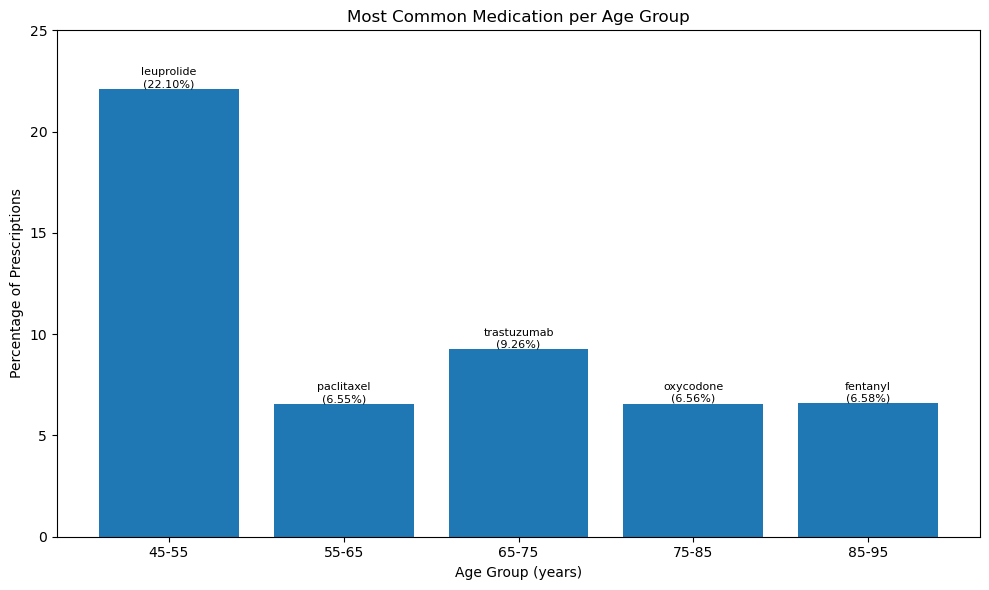

In [71]:
# Define bins from 45 to 95 with step 10
bins = list(range(45, 96, 10))  # [45,55,65,75,85,95]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Create age bucket column
pat_dia_med_merged_df["age_bucket"] = pd.cut(
    pat_dia_med_merged_df["age_years"], bins=bins, labels=labels, right=False
)

# Count prescriptions by age bucket and medication
age_med_counts = (
    pat_dia_med_merged_df.groupby(["age_bucket", "med_generic_name"])
      .size()
      .reset_index(name="count")
)

# Compute % within each bucket
age_totals = age_med_counts.groupby("age_bucket")["count"].transform("sum")
age_med_counts["percent"] = age_med_counts["count"] / age_totals * 100

# For each age bucket, get the med with the highest percent
top_meds_by_age = (
    age_med_counts.loc[
        age_med_counts.groupby("age_bucket")["percent"].idxmax()
    ]
    .sort_values("age_bucket")
)

# Plot 
plt.figure(figsize=(10, 6))
ax = plt.bar(top_meds_by_age["age_bucket"].astype(str), top_meds_by_age["percent"])

plt.title("Most Common Medication per Age Group")
plt.xlabel("Age Group (years)")
plt.ylabel("Percentage of Prescriptions")
plt.ylim(0, 25)

# Add labels with med name + percentage
for i, (bucket, med, percent) in enumerate(
    zip(top_meds_by_age["age_bucket"], top_meds_by_age["med_generic_name"], top_meds_by_age["percent"])
):
    plt.text(i, percent, f"{med}\n({percent:.2f}%)", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

In [76]:
# Count prescriptions by med + route (restricted to top 20 meds)
med_route_counts = (
    pat_dia_med_merged_df[pat_dia_med_merged_df["med_generic_name"].isin(top_meds)]
      .groupby(["med_generic_name", "med_route_name"])
      .size()
      .reset_index(name="count")
)

# Compute % within each med
med_totals = med_route_counts.groupby("med_generic_name")["count"].transform("sum")
med_route_counts["percent"] = med_route_counts["count"] / med_totals * 100

# For each med, find the most common route
top_routes_by_med = (
    med_route_counts.loc[
        med_route_counts.groupby("med_generic_name")["percent"].idxmax()
    ]
    .set_index("med_generic_name")
    .loc[top_meds]  # keep same order as top-20
    .reset_index()
)

# Plot percentages
plt.figure(figsize=(14, 7))
ax = plt.bar(top_routes_by_med["med_generic_name"], top_routes_by_med["percent"])

plt.title("Most Common Route of Administration for Top 20 Medications")
plt.xlabel("Medication (generic name)")
plt.ylabel("Percentage of Prescriptions")
plt.ylim(0, 110)
plt.xticks(rotation=45, ha="right")

# Add labels with route + percentage
for i, (med, route, percent) in enumerate(
    zip(top_routes_by_med["med_generic_name"], 
        top_routes_by_med["med_route_name"], 
        top_routes_by_med["percent"])
):
    plt.text(i, percent, f"{route}\n({percent:.2f}%)", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

KeyError: 'med_generic_name'

<Figure size 1400x700 with 0 Axes>

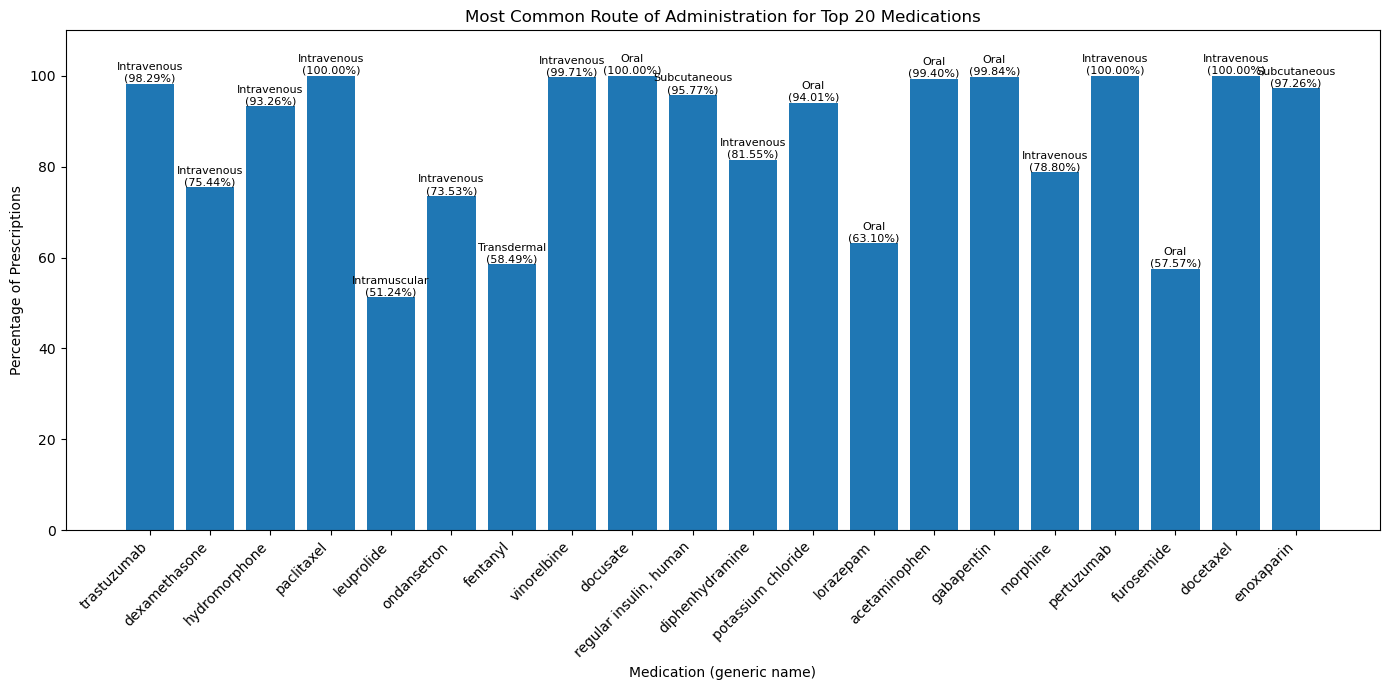

In [77]:
# Count prescriptions by med + route (restricted to top 20 meds)
med_route_counts = (
    pat_dia_med_merged_df[pat_dia_med_merged_df["med_generic_name"].isin(top_meds)]
      .groupby(["med_generic_name", "med_route_name"], as_index=False)
      .size()
      .rename(columns={"size": "count"})
)

# Compute % within each med
med_route_counts["percent"] = (
    med_route_counts["count"] /
    med_route_counts.groupby("med_generic_name")["count"].transform("sum") * 100
)

# For each med, keep the most common route (highest percent)
# (Sort descending by percent, then drop duplicates to keep the first per med)
top_routes_by_med = (
    med_route_counts
      .sort_values(["med_generic_name", "percent"], ascending=[True, False])
      .drop_duplicates(subset=["med_generic_name"], keep="first")
)

# Keep only meds that actually appear, and preserve the original top_meds order
present_meds = [m for m in top_meds if m in set(top_routes_by_med["med_generic_name"])]
top_routes_by_med["med_generic_name"] = pd.Categorical(
    top_routes_by_med["med_generic_name"],
    categories=present_meds,
    ordered=True
)
top_routes_by_med = top_routes_by_med.sort_values("med_generic_name").reset_index(drop=True)

# Plot percentages
plt.figure(figsize=(14, 7))
plt.bar(top_routes_by_med["med_generic_name"].astype(str), top_routes_by_med["percent"])

plt.title("Most Common Route of Administration for Top 20 Medications")
plt.xlabel("Medication (generic name)")
plt.ylabel("Percentage of Prescriptions")
plt.ylim(0, 110)
plt.xticks(rotation=45, ha="right")

# Add labels with route + percentage
for i, (med, route, percent) in enumerate(
    zip(top_routes_by_med["med_generic_name"].astype(str),
        top_routes_by_med["med_route_name"],
        top_routes_by_med["percent"])
):
    plt.text(i, percent, f"{route}\n({percent:.2f}%)", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

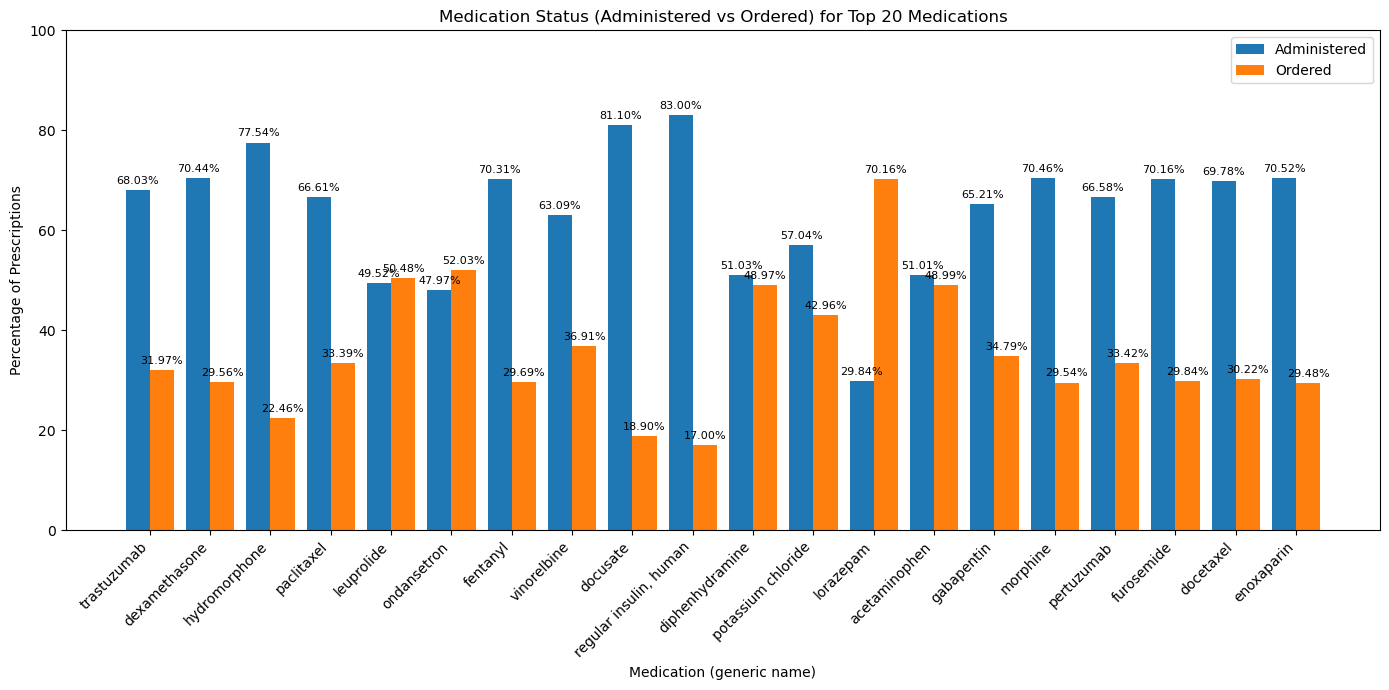

In [78]:
# Count prescriptions by med + status (restricted to top 20 meds)
med_status_counts = (
    pat_dia_med_merged_df[pat_dia_med_merged_df["med_generic_name"].isin(top_meds)]
      .groupby(["med_generic_name", "med_status"])
      .size()
      .unstack(fill_value=0)
      .reindex(top_meds)   # preserve top-20 order
)

# Convert to percentages within each medication
med_status_perc = med_status_counts.div(med_status_counts.sum(axis=1), axis=0) * 100

# Plot side-by-side bars
x = np.arange(len(med_status_perc))
width = 0.4

fig, ax = plt.subplots(figsize=(14, 7))

bars1 = ax.bar(x - width/2, med_status_perc.get("administered", 0), 
               width, label="Administered")
bars2 = ax.bar(x + width/2, med_status_perc.get("ordered", 0), 
               width, label="Ordered")

# Titles and labels
ax.set_title("Medication Status (Administered vs Ordered) for Top 20 Medications")
ax.set_xlabel("Medication (generic name)")
ax.set_ylabel("Percentage of Prescriptions")
ax.set_xticks(x)
ax.set_xticklabels(med_status_perc.index, rotation=45, ha="right")
ax.set_ylim(0, 100)
ax.legend()

# Add % labels above bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}%",
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

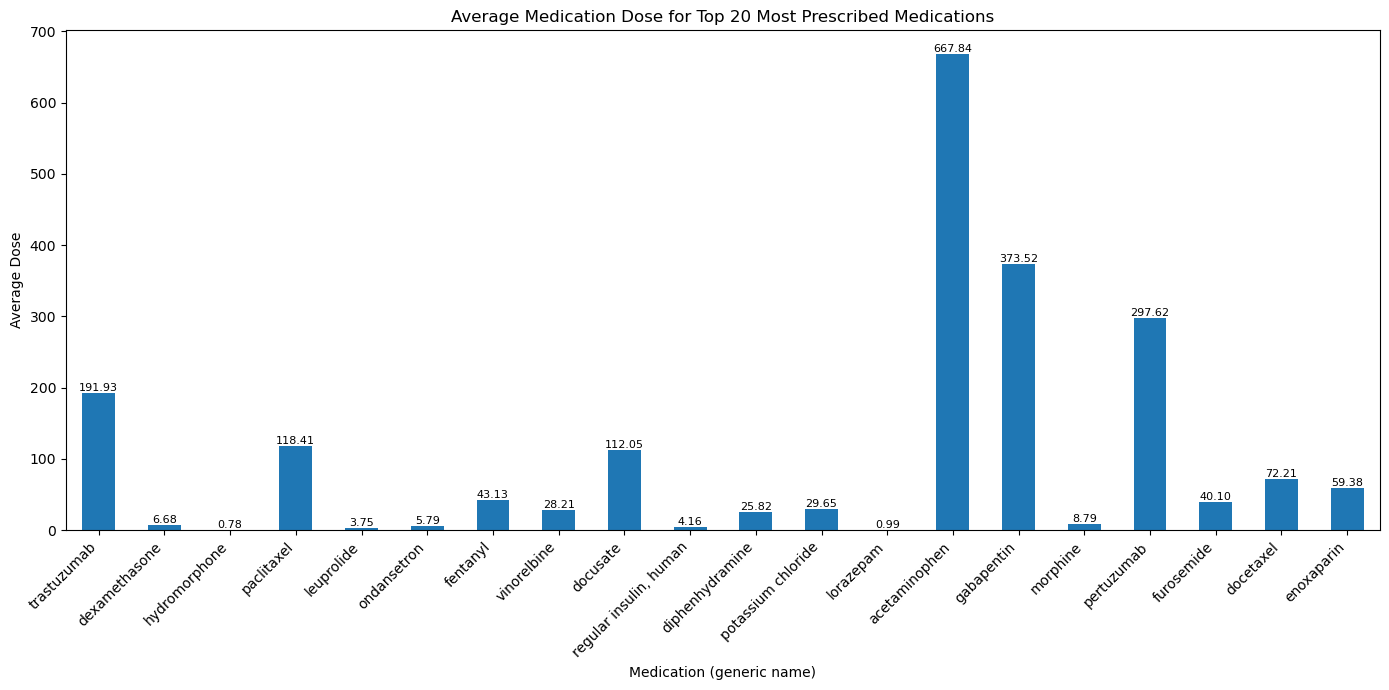

In [79]:
# Compute average med_dose for top-20 meds
avg_dose_top20 = (
    pat_dia_med_merged_df[pat_dia_med_merged_df["med_generic_name"].isin(top_meds)]
      .groupby("med_generic_name")["med_dose"]
      .mean()
      .reindex(top_meds)   # keep same order as top-20 counts
)

# Plot
plt.figure(figsize=(14, 7))
ax = avg_dose_top20.plot(kind="bar")

plt.title("Average Medication Dose for Top 20 Most Prescribed Medications")
plt.xlabel("Medication (generic name)")
plt.ylabel("Average Dose")
plt.xticks(rotation=45, ha="right")

# Add labels above bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

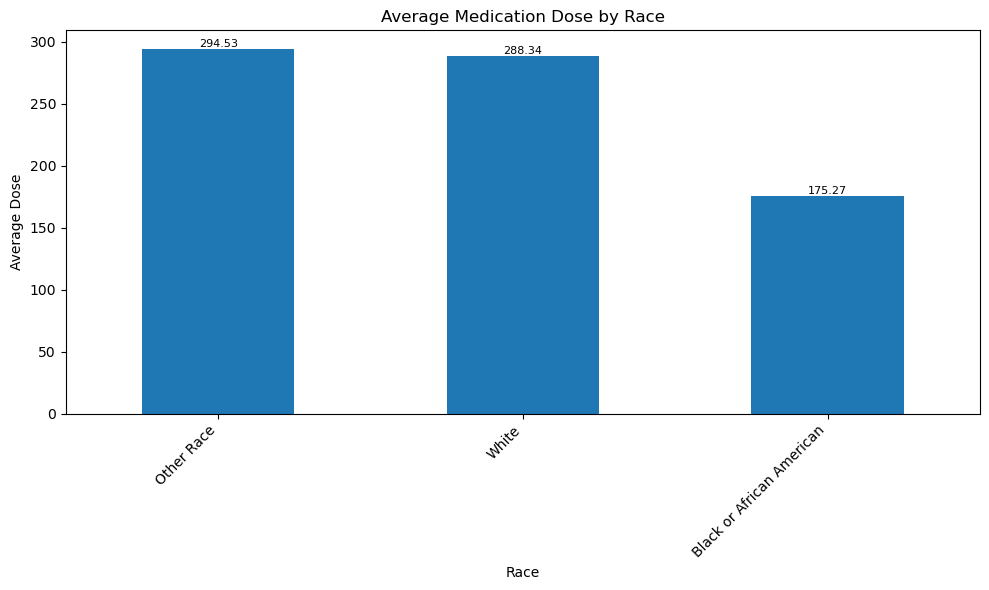

In [80]:
# Compute average med_dose per race
avg_dose_by_race = (
    pat_dia_med_merged_df.groupby("race")["med_dose"]
      .mean()
      .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(10, 6))
ax = avg_dose_by_race.plot(kind="bar")

plt.title("Average Medication Dose by Race")
plt.xlabel("Race")
plt.ylabel("Average Dose")
plt.xticks(rotation=45, ha="right")

# Add labels above bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

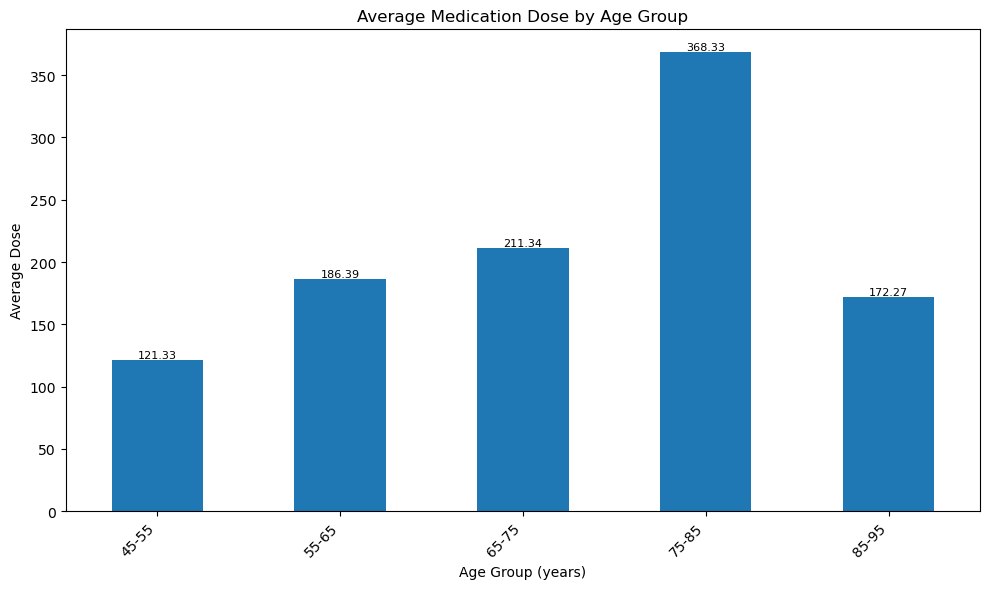

In [81]:
# Compute average med_dose per age bucket
avg_dose_by_age = (
    pat_dia_med_merged_df.groupby("age_bucket")["med_dose"]
      .mean()
      .reindex(labels)   # keep bucket order
)

# Plot
plt.figure(figsize=(10, 6))
ax = avg_dose_by_age.plot(kind="bar")

plt.title("Average Medication Dose by Age Group")
plt.xlabel("Age Group (years)")
plt.ylabel("Average Dose")
plt.xticks(rotation=45, ha="right")

# Add labels above bars
for p in ax.patches:
    if not pd.isna(p.get_height()):
        ax.annotate(f"{p.get_height():.2f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

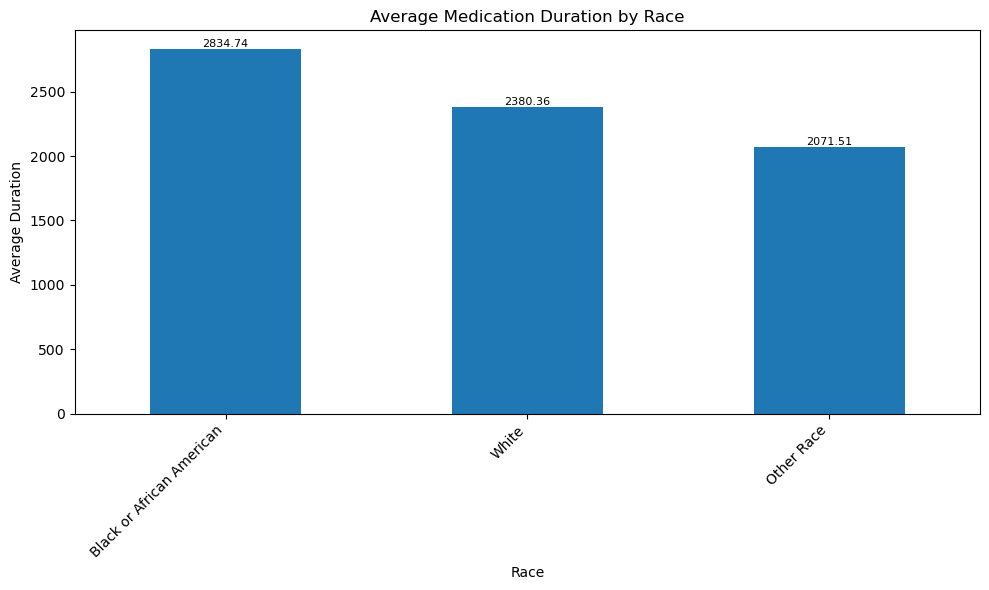

In [82]:
# Compute average med_duration_days per race
avg_dose_by_race = (
    pat_dia_med_merged_df.groupby("race")["med_duration_days"]
      .mean()
      .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(10, 6))
ax = avg_dose_by_race.plot(kind="bar")

plt.title("Average Medication Duration by Race")
plt.xlabel("Race")
plt.ylabel("Average Duration")
plt.xticks(rotation=45, ha="right")

# Add labels above bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

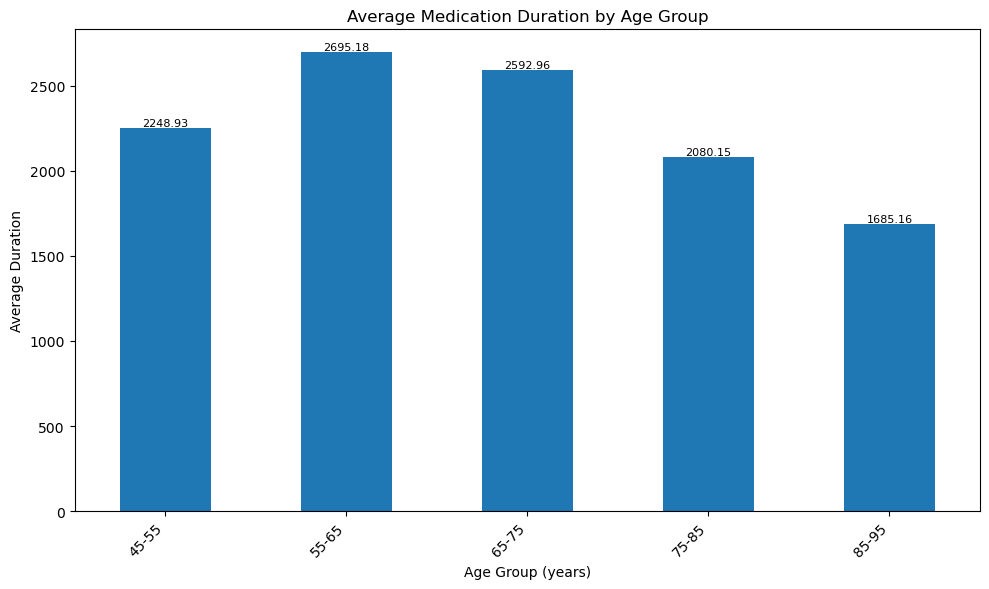

In [83]:
# Compute average med_dose per bucket
avg_dose_by_age = (
    pat_dia_med_merged_df.groupby("age_bucket")["med_duration_days"]
      .mean()
      .reindex(labels)   # keep bucket order
)

# Plot
plt.figure(figsize=(10, 6))
ax = avg_dose_by_age.plot(kind="bar")

plt.title("Average Medication Duration by Age Group")
plt.xlabel("Age Group (years)")
plt.ylabel("Average Duration")
plt.xticks(rotation=45, ha="right")

# Add labels above bars
for p in ax.patches:
    if not pd.isna(p.get_height()):
        ax.annotate(f"{p.get_height():.2f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

# Biomarker

In [84]:
df4 = pd.read_excel("ConcertAI Data Science Interview Dataset.xlsx", sheet_name="Biomarker")
df4.head()

,patient_id,report_date,biomarker_name_name,specimen_date,specimen_site_vocab,specimen_type_code,specimen_type_name,specimen_type_vocab,biomarker_test_type_code,biomarker_test_type_name,laboratory_name,test_result_code,test_result_name,test_result_1_numeric,test_result_1_numeric_range,test_result_1_unit_code,test_result_1_unit_name
0,SP001436563,2008-01-07,ER Status,2008-01-07,SNOMED,TISSUE,Tissue,SNOMED,IHC,Immunohistochemistry,Lab_2,ER_POS,Positive,NaN,NaN,NaN,NaN
1,SP000311834,2008-01-21,ER Status,2008-01-21,SNOMED,TISSUE,Tissue,SNOMED,IHC,Immunohistochemistry,Lab_1,ER_POS,Positive,NaN,NaN,NaN,NaN
2,SP000491242,2008-01-04,ER Status,2008-01-04,SNOMED,TISSUE,Tissue,SNOMED,IHC,Immunohistochemistry,Lab_4,ER_POS,Positive,NaN,NaN,NaN,NaN
3,SP000268661,2009-06-13,ER Status,2009-06-13,SNOMED,TISSUE,Tissue,SNOMED,IHC,Immunohistochemistry,Lab_5,ER_NEG,Negative,NaN,NaN,NaN,NaN
4,SP000268661,2009-06-13,PR Status,2009-06-13,SNOMED,TISSUE,Tissue,SNOMED,IHC,Immunohistochemistry,Lab_1,PR_NEG,Negative,NaN,NaN,NaN,NaN


In [94]:
df4.isnull().sum()

patient_id                       0
report_date                      0
biomarker_name_name              0
specimen_date                    0
specimen_site_vocab              0
specimen_type_code               0
specimen_type_name               0
specimen_type_vocab              0
biomarker_test_type_code         0
biomarker_test_type_name         0
laboratory_name                  0
test_result_code                 0
test_result_name                 0
test_result_1_numeric          618
test_result_1_numeric_range    652
test_result_1_unit_code        618
test_result_1_unit_name        618
dtype: int64

In [85]:
df4.shape

(652, 17)

In [86]:
df4.patient_id.nunique()

94

In [87]:
df4.dtypes

patient_id                             object
report_date                    datetime64[ns]
biomarker_name_name                    object
specimen_date                  datetime64[ns]
specimen_site_vocab                    object
specimen_type_code                     object
specimen_type_name                     object
specimen_type_vocab                    object
biomarker_test_type_code               object
biomarker_test_type_name               object
laboratory_name                        object
test_result_code                       object
test_result_name                       object
test_result_1_numeric                 float64
test_result_1_numeric_range           float64
test_result_1_unit_code                object
test_result_1_unit_name                object
dtype: object

In [88]:
df4.test_result_code.unique()

array(['ER_POS', 'ER_NEG', 'PR_NEG', 'HER2_NEG', 'HER2_IHC_0', 'HER2_POS',
       'HER2_IHC_2PLUS', 'PDL1_HIGH', 'PGR_POS', 'PGR_NEG', 'ERBB2_NEG',
       'A1C_VAL', 'KRAS_POS', 'ALK_NEG', 'BRAF_POS', 'BRCA1_POS',
       'BRCA1_NEG', 'PR_POS', 'ERBB2_POS', 'PDL1_LOW', 'ALK_POS',
       'EGFR_POS', 'HER2_IHC_1PLUS', 'EGFR_NEG', 'HER2_IHC_3PLUS',
       'BRAF_NEG', 'KRAS_NEG'], dtype=object)

Identifying triple-negative breast cancer (TNBC) from biomarker test results means we need to find patients who are:
1. ER- (Estrogen receptor)
2. PR- (Progesterone receptor)
3. HER2-

Source: 'https://www.cancer.org/cancer/types/breast-cancer/understanding-a-breast-cancer-diagnosis/breast-cancer-her2-status.html'

Based on the values in our dataset, negative values are characterized by:
1. ER_NEG
2. PR_NEG (or PGR_NEG depending on naming convention)
3. HER2_NEG (and sometimes HER2_IHC_0 or HER2_IHC_1PLUS are also considered negative in practice)

Additionally, patients have multiple results ('test_result_code') for same test ('biomarker_name_name') on different dates ('report_date'). For calculating patients with TNBC, I will take the result of the most recent test since here, the question asks: 'What % of patients in the study cohort ***have*** triple negative breast cancer?'.

In [89]:
# sort so most recent comes first
df4_sorted = df4.sort_values(["patient_id", "biomarker_name_name", "report_date"], ascending=[True, True, False])

# keep most recent result per patient & biomarker
df4_latest = df4_sorted.drop_duplicates(subset=["patient_id", "biomarker_name_name"], keep="first")
df4_latest.head()

,patient_id,report_date,biomarker_name_name,specimen_date,specimen_site_vocab,specimen_type_code,specimen_type_name,specimen_type_vocab,biomarker_test_type_code,biomarker_test_type_name,laboratory_name,test_result_code,test_result_name,test_result_1_numeric,test_result_1_numeric_range,test_result_1_unit_code,test_result_1_unit_name
36,SP000035853,2014-07-14,HER2 IHC,2014-07-02,SNOMED,TISSUE,Blood,SNOMED,FISH,Immunohistochemistry,Lab_3,HER2_IHC_2PLUS,2+,NaN,NaN,NaN,NaN
34,SP000035853,2013-06-28,HER2 Status,2013-06-23,SNOMED,BLOOD,Blood,SNOMED,PCR,FISH,Lab_1,HER2_POS,Positive,NaN,NaN,NaN,NaN
37,SP000035853,2015-09-04,PD-L1,2015-08-24,SNOMED,TISSUE,Blood,SNOMED,FISH,FISH,Lab_5,PDL1_HIGH,High,NaN,NaN,NaN,NaN
43,SP000045681,2016-02-01,ALK Rearrangement,2016-01-20,SNOMED,BLOOD,Blood,SNOMED,IHC,Immunohistochemistry,Lab_2,ALK_NEG,Negative,NaN,NaN,NaN,NaN
40,SP000045681,2015-02-14,ERBB2,2015-02-12,SNOMED,BLOOD,Blood,SNOMED,PCR,Immunohistochemistry,Lab_1,ERBB2_NEG,Negative,NaN,NaN,NaN,NaN


In [90]:
df4_latest.shape

(496, 17)

In [91]:
# storing different flags for biomarker codes in a list to ensure consistent values for ER-, PR- and HER2- respectively
er_negative_codes = ["ER_NEG"]
pr_negative_codes = ["PR_NEG", "PGR_NEG"]
her2_negative_codes = ["HER2_NEG", "HER2_IHC_0", "HER2_IHC_1PLUS"]

In [92]:
# ER negative
er_neg = df4_latest[df4_latest["test_result_code"].isin(er_negative_codes)][["patient_id"]].assign(ER_neg=True)

# PR negative (some datasets use PR_NEG, some PGR_NEG)
pr_neg = df4_latest[df4_latest["test_result_code"].isin(pr_negative_codes)][["patient_id"]].assign(PR_neg=True)

# HER2 negative
her2_neg = df4_latest[df4_latest["test_result_code"].isin(her2_negative_codes)][["patient_id"]].assign(HER2_neg=True)

# Merge all flags
tnbc_flags = (
    er_neg.merge(pr_neg, on="patient_id", how="inner")
          .merge(her2_neg, on="patient_id", how="inner")
)

# Unique TNBC patients
tnbc_patients = tnbc_flags["patient_id"].unique()
print("Number of TNBC patients:", len(tnbc_patients))

Number of TNBC patients: 15


In [93]:
# % of patients in the study cohort have triple negative breast cancer - answer to the last question
print(f"Percent of TNBC patients in the study cohort: {(len(tnbc_patients)/df1.patient_id.nunique())*100:.2f}")

Percent of TNBC patients in the study cohort: 15.96
